In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
central=pd.read_csv("../data/yield.csv")
central.head(10)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
5,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1966,1966,hg/ha,14400
6,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1967,1967,hg/ha,14144
7,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1968,1968,hg/ha,17064
8,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1969,1969,hg/ha,17177
9,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1970,1970,hg/ha,14757


In [3]:
central.shape

(56717, 12)

In [4]:
central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


## Removing Unimportant Columns from Dataframe
We will remove Domain Code, Domain, Element, Unit, Element, Element Code from the dataframe as they don't contribute to the prediction of our final value

In [5]:
dropped_columns=['Domain Code','Domain','Area Code','Element Code','Element','Item Code','Year Code','Unit']
central.drop(dropped_columns,inplace=True,axis=1)
central.head(10)

,Area,Item,Year,Value
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400
5,Afghanistan,Maize,1966,14400
6,Afghanistan,Maize,1967,14144
7,Afghanistan,Maize,1968,17064
8,Afghanistan,Maize,1969,17177
9,Afghanistan,Maize,1970,14757


### Renaiming Value to Yield

In [6]:
central.rename(index=str,columns={"Value":"Yield"},inplace=True)
central.head(2)

,Area,Item,Year,Yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000


In [7]:
## Describing Data
central.describe()

,Year,Yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


## Combining Pesticides Data

In [8]:
pesticides=pd.read_csv("../data/pesticides.csv")
pesticides.head(5)

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [9]:
pesticides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


In [10]:
print(pesticides.columns.isna().sum())

0


### Removing Unwanted Columns

In [11]:
dropped_columns=['Domain','Element','Item','Unit']
pesticides.drop(dropped_columns,inplace=True,axis=1)
pesticides.head(10)

,Area,Year,Value
0,Albania,1990,121.00
1,Albania,1991,121.00
2,Albania,1992,121.00
3,Albania,1993,121.00
4,Albania,1994,201.00
5,Albania,1995,251.00
6,Albania,1996,313.96
7,Albania,1997,376.93
8,Albania,1998,439.89
9,Albania,1999,502.86


In [12]:
### Renaiming Value to Pest
pesticides.rename(index=str,columns={"Value":"Pest"},inplace=True)

### Merging Pesticides with the Central DF

In [13]:
central=pd.merge(central,pesticides,on=["Area","Year"])
central.head(10)

,Area,Item,Year,Yield,Pest
0,Albania,Maize,1990,36613,121.0
1,Albania,Potatoes,1990,66667,121.0
2,Albania,"Rice, paddy",1990,23333,121.0
3,Albania,Sorghum,1990,12500,121.0
4,Albania,Soybeans,1990,7000,121.0
5,Albania,Wheat,1990,30197,121.0
6,Albania,Maize,1991,29068,121.0
7,Albania,Potatoes,1991,77818,121.0
8,Albania,"Rice, paddy",1991,28538,121.0
9,Albania,Sorghum,1991,6667,121.0


## Combining RainFall Data

In [14]:
rainfall=pd.read_csv("../data/rainfall.csv")
rainfall.head(5)

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [15]:
### Renaming average_rain_fall_mm_per_year
rainfall.rename(index=str,columns={
    "average_rain_fall_mm_per_year":"Rainfall",
    " Area":"Area",
    },inplace=True)

In [16]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Area      6727 non-null   object
 1   Year      6727 non-null   int64 
 2   Rainfall  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [17]:
rainfall.columns

Index(['Area', 'Year', 'Rainfall'], dtype='object')

### Merging RainFall with central DF

In [18]:
central=pd.merge(central,rainfall,on=["Area","Year"])
central.head(10)

,Area,Item,Year,Yield,Pest,Rainfall
0,Albania,Maize,1990,36613,121.0,1485
1,Albania,Potatoes,1990,66667,121.0,1485
2,Albania,"Rice, paddy",1990,23333,121.0,1485
3,Albania,Sorghum,1990,12500,121.0,1485
4,Albania,Soybeans,1990,7000,121.0,1485
5,Albania,Wheat,1990,30197,121.0,1485
6,Albania,Maize,1991,29068,121.0,1485
7,Albania,Potatoes,1991,77818,121.0,1485
8,Albania,"Rice, paddy",1991,28538,121.0,1485
9,Albania,Sorghum,1991,6667,121.0,1485


### Combining Temperature Data

In [19]:
temp=pd.read_csv("../data/temp.csv")
temp.head(10)

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
5,1854,Côte D'Ivoire,NaN
6,1855,Côte D'Ivoire,NaN
7,1856,Côte D'Ivoire,26.28
8,1857,Côte D'Ivoire,25.17
9,1858,Côte D'Ivoire,25.49


In [20]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [21]:
temp.rename(index=str,columns={
    "year":"Year",
    "country":"Area",
    "avg_temp":"Temp"
},inplace=True)

### Merging Data with central DF

In [22]:
central=pd.merge(central,temp,on=["Area","Year"])
central.head(10)

,Area,Item,Year,Yield,Pest,Rainfall,Temp
0,Albania,Maize,1990,36613,121.0,1485,16.37
1,Albania,Potatoes,1990,66667,121.0,1485,16.37
2,Albania,"Rice, paddy",1990,23333,121.0,1485,16.37
3,Albania,Sorghum,1990,12500,121.0,1485,16.37
4,Albania,Soybeans,1990,7000,121.0,1485,16.37
5,Albania,Wheat,1990,30197,121.0,1485,16.37
6,Albania,Maize,1991,29068,121.0,1485,15.36
7,Albania,Potatoes,1991,77818,121.0,1485,15.36
8,Albania,"Rice, paddy",1991,28538,121.0,1485,15.36
9,Albania,Sorghum,1991,6667,121.0,1485,15.36


In [23]:
central.shape

(28248, 7)

In [24]:
central.head(10)

,Area,Item,Year,Yield,Pest,Rainfall,Temp
0,Albania,Maize,1990,36613,121.0,1485,16.37
1,Albania,Potatoes,1990,66667,121.0,1485,16.37
2,Albania,"Rice, paddy",1990,23333,121.0,1485,16.37
3,Albania,Sorghum,1990,12500,121.0,1485,16.37
4,Albania,Soybeans,1990,7000,121.0,1485,16.37
5,Albania,Wheat,1990,30197,121.0,1485,16.37
6,Albania,Maize,1991,29068,121.0,1485,15.36
7,Albania,Potatoes,1991,77818,121.0,1485,15.36
8,Albania,"Rice, paddy",1991,28538,121.0,1485,15.36
9,Albania,Sorghum,1991,6667,121.0,1485,15.36


In [25]:
central.to_csv("../Data/Final.csv",index=False)

Bhurva's attempt of either really good viz or just ruining it all

In [27]:
central.head(10)

,Area,Item,Year,Yield,Pest,Rainfall,Temp
0,Albania,Maize,1990,36613,121.0,1485,16.37
1,Albania,Potatoes,1990,66667,121.0,1485,16.37
2,Albania,"Rice, paddy",1990,23333,121.0,1485,16.37
3,Albania,Sorghum,1990,12500,121.0,1485,16.37
4,Albania,Soybeans,1990,7000,121.0,1485,16.37
5,Albania,Wheat,1990,30197,121.0,1485,16.37
6,Albania,Maize,1991,29068,121.0,1485,15.36
7,Albania,Potatoes,1991,77818,121.0,1485,15.36
8,Albania,"Rice, paddy",1991,28538,121.0,1485,15.36
9,Albania,Sorghum,1991,6667,121.0,1485,15.36


In [28]:
import seaborn as sns

Area's cultivations per year

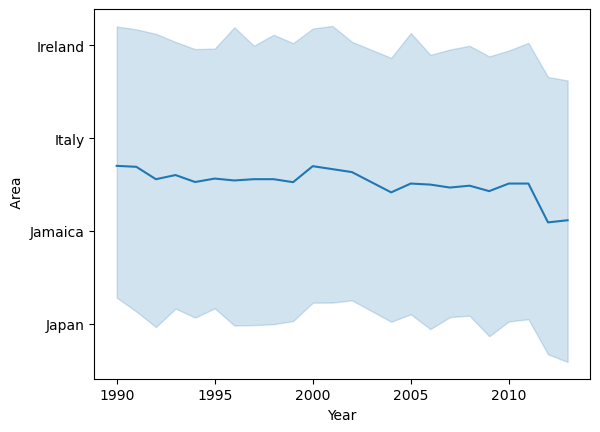

In [30]:
sns.lineplot(x='Year', y='Area', data=central)
plt.xlabel('Year')
plt.ylabel(' Area')
plt.show()


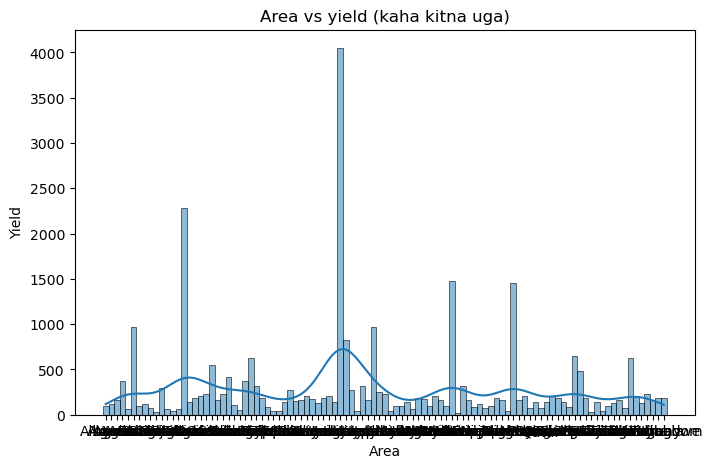

In [39]:
plt.figure(figsize=[8,5])
sns.histplot(data=central,x="Area",
             bins=20,
             kde=True).set(title="Area vs yield (kaha kitna uga)",ylabel="Yield"
                                                         )
plt.show()

In [40]:
central.head()

,Area,Item,Year,Yield,Pest,Rainfall,Temp
0,Albania,Maize,1990,36613,121.0,1485,16.37
1,Albania,Potatoes,1990,66667,121.0,1485,16.37
2,Albania,"Rice, paddy",1990,23333,121.0,1485,16.37
3,Albania,Sorghum,1990,12500,121.0,1485,16.37
4,Albania,Soybeans,1990,7000,121.0,1485,16.37


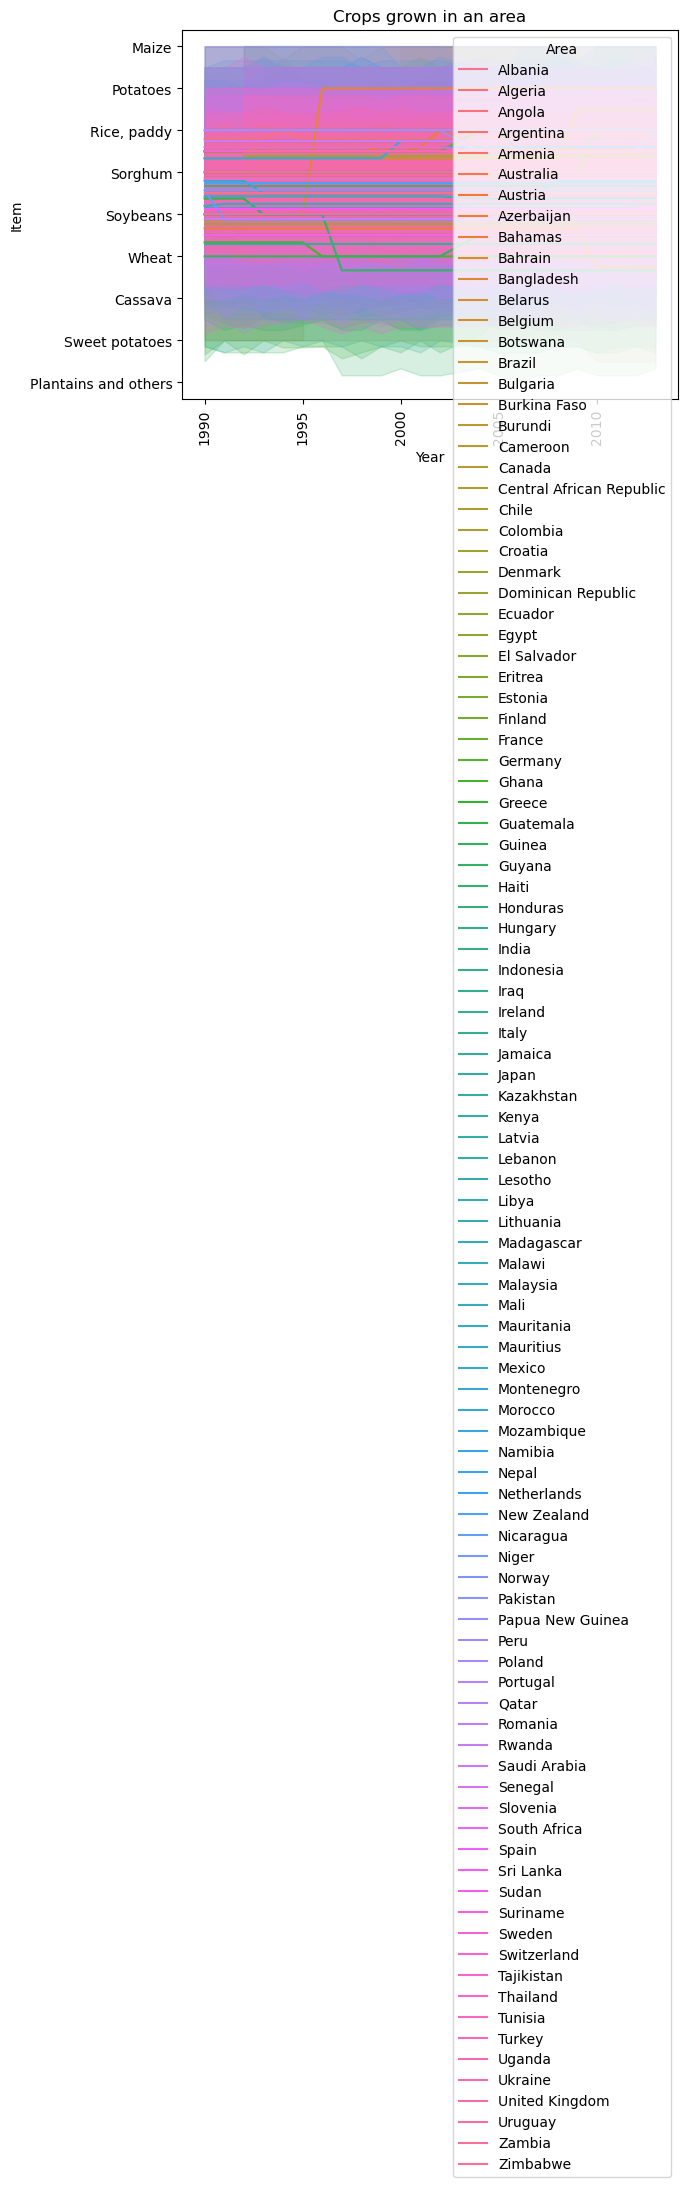

In [42]:
sns.lineplot(x="Year", y="Item", hue="Area", data=central)
plt.xlabel('Year')
plt.ylabel('Item')
plt.title('Crops grown in an area')
plt.xticks(rotation=90)
plt.show()


In [43]:
central.head()

,Area,Item,Year,Yield,Pest,Rainfall,Temp
0,Albania,Maize,1990,36613,121.0,1485,16.37
1,Albania,Potatoes,1990,66667,121.0,1485,16.37
2,Albania,"Rice, paddy",1990,23333,121.0,1485,16.37
3,Albania,Sorghum,1990,12500,121.0,1485,16.37
4,Albania,Soybeans,1990,7000,121.0,1485,16.37


Scatterplot Matrix

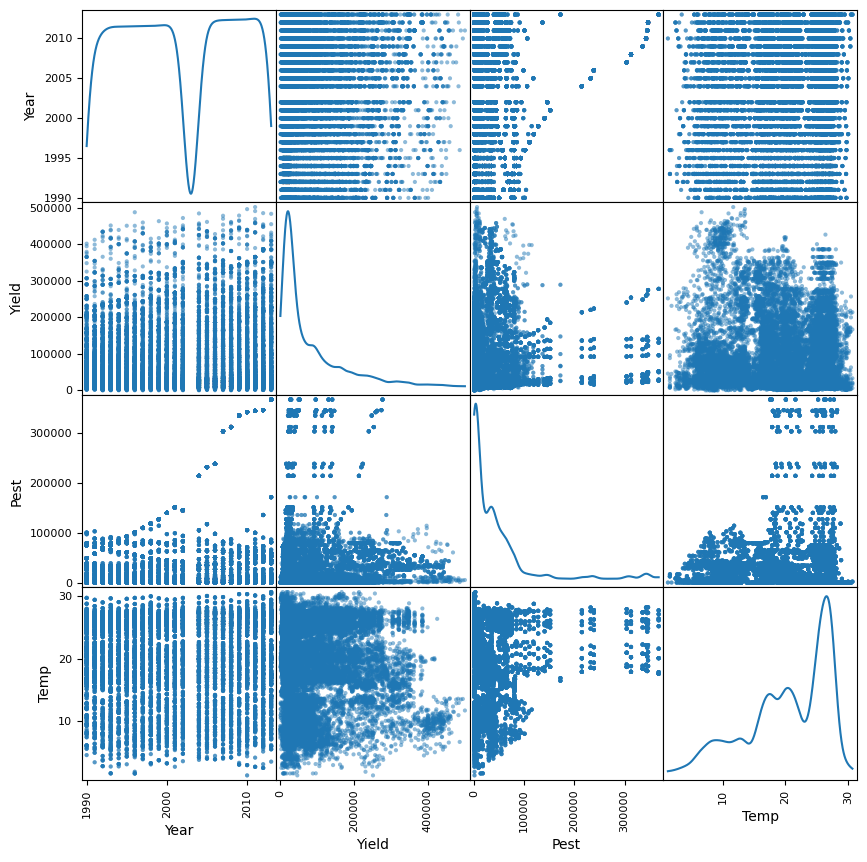

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

data = central

columns = ["Area", 'Item', 'Year', 'Yield', 'Pest', 'Rainfall', 'Temp']

scatter_matrix(data[columns], figsize=(10,10), diagonal='kde'
               )

plt.show()

Tried a parallel coordinates plot but is target variable Yield I am not sure? Why doesn't this work? I am not sure :) 

TypeError: 'value' must be an instance of str or bytes, not a numpy.int64

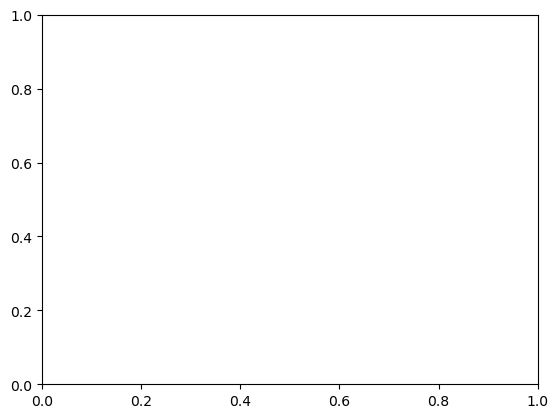

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

data = central
columns = ["Area", 'Item', 'Year', 'Yield', 'Pest', 'Rainfall', 'Temp']
parallel_coordinates(data[columns], 'Yield', colormap='jet')
plt.show()



Heatmap time hehe love this shit

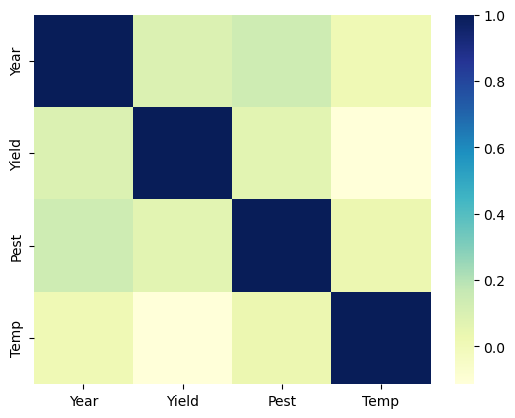

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

data = central
columns = ["Area", 'Item', 'Year', 'Yield', 'Pest', 'Rainfall', 'Temp']
corr_matrix = data[columns].corr()
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()




Pairplot

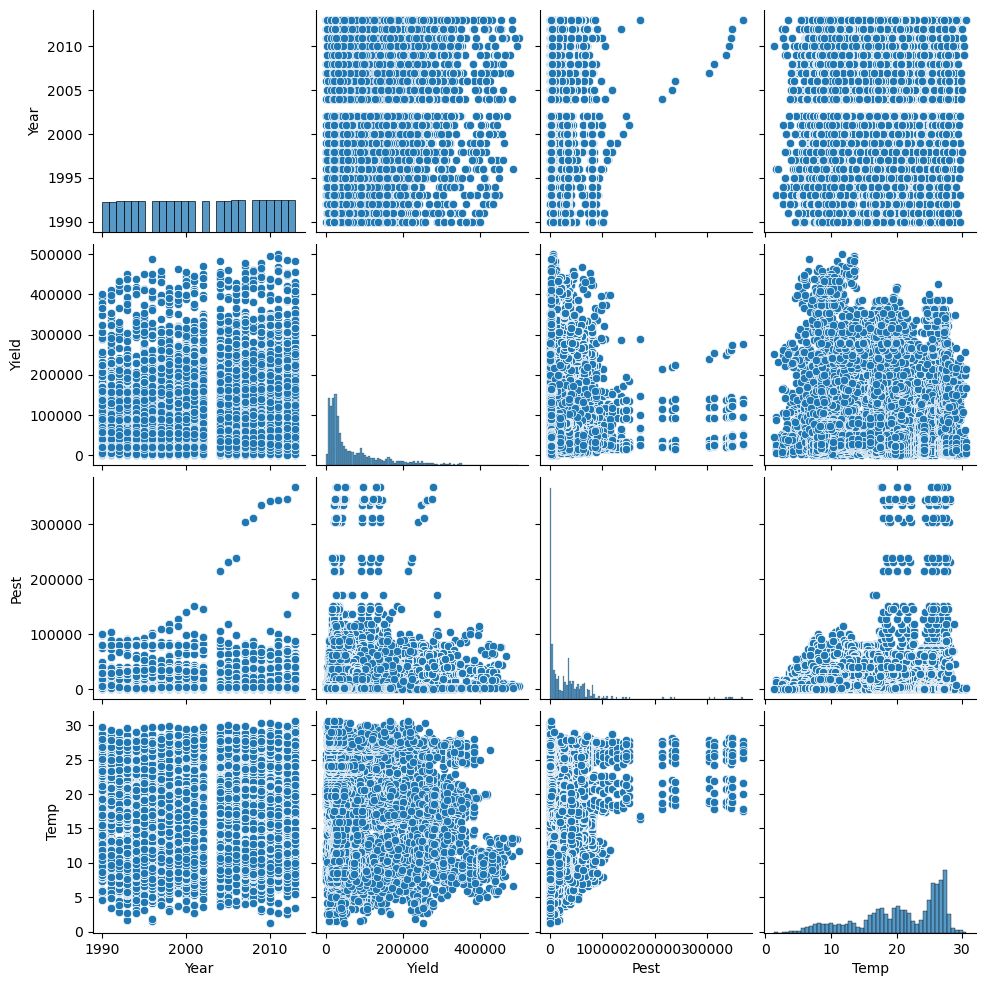

In [66]:
data = central
columns = ["Area", 'Item', 'Year', 'Yield', 'Pest', 'Rainfall', 'Temp']
sns.pairplot(data[columns])
plt.show()

In [67]:
central.head()

,Area,Item,Year,Yield,Pest,Rainfall,Temp
0,Albania,Maize,1990,36613,121.0,1485,16.37
1,Albania,Potatoes,1990,66667,121.0,1485,16.37
2,Albania,"Rice, paddy",1990,23333,121.0,1485,16.37
3,Albania,Sorghum,1990,12500,121.0,1485,16.37
4,Albania,Soybeans,1990,7000,121.0,1485,16.37


3D scatterplot but I am a little too dumb for this shit

TypeError: unhashable type: 'Series'

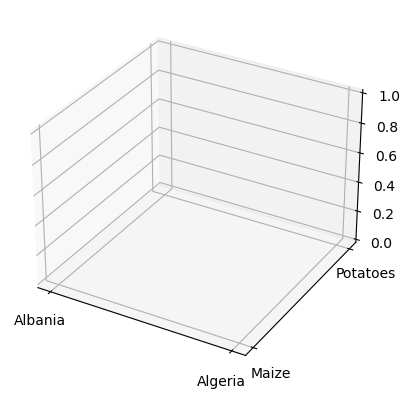

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data= central

x = data['Area']
y = data['Item']
z = data['Year']
c = data['Yield']  # color the points
s = data['Temp']  # size of the points
m = data['Rainfall']# marker shape

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=c, s=s, marker=m)

ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')
ax.set_zlabel('Parameter 3')

plt.show()


Pandas profiling ofc

In [71]:
pip install pandas-profiling


     ---------------------------------------- 0.0/324.4 kB ? eta -:--:--
     --- --------------------------------- 30.7/324.4 kB 640.0 kB/s eta 0:00:01
     ---- -------------------------------- 41.0/324.4 kB 487.6 kB/s eta 0:00:01
     ---------- -------------------------- 92.2/324.4 kB 871.5 kB/s eta 0:00:01
     ------------- ---------------------- 122.9/324.4 kB 717.5 kB/s eta 0:00:01
     ------------------- ---------------- 174.1/324.4 kB 803.1 kB/s eta 0:00:01
     ---------------------- ------------- 204.8/324.4 kB 778.2 kB/s eta 0:00:01
     -------------------------------- --- 297.0/324.4 kB 916.0 kB/s eta 0:00:01
     ------------------------------------ 324.4/324.4 kB 872.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/345.9 kB ? eta -:--:--
     -------- ------------------------------ 71.7/345.9 kB 4.1 MB/s eta 0:00:01
     --------------- ---------------------- 143.4/345.9 kB 1.7 MB/s eta 0:00:01
     ------------------- ------------------ 174.1/345.

In [72]:
import pandas as pd
import pandas_profiling

C:\Users\bhurv\AppData\Local\Temp\ipykernel_17288\3826459295.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [73]:
data= central

profile = pandas_profiling.ProfileReport(data)

print(profile.to_html())

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<!doctype html><html lang=en><head><meta charset=utf-8><meta name=viewport content="width=device-width, initial-scale=1, shrink-to-fit=no"><meta name=description content="Profile report generated by YData! Visit us at https://ydata.ai"><meta name=author content="YData and the open source community."><meta name=generator content="Pandas Profiling v3.6.6"><meta name=url content=https://github.com/ydataai/pandas-profiling><meta name=date content="2023-04-06 09:06:58.071977"><title>Pandas Profiling Report</title><style>
/*!
 * Bootstrap v3.3.7 (http://getbootstrap.com)
 * Copyright 2011-2016 Twitter, Inc.
 * Licensed under MIT (https://github.com/twbs/bootstrap/blob/master/LICENSE)
 *//*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.css */html{font-family:sans-serif;-webkit-text-size-adjust:100%;-ms-text-size-adjust:100%}body{margin:0}article,aside,details,figcaption,figure,footer,header,hgroup,main,menu,nav,section,summary{display:block}audio,canvas,progress,video{dis